In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import subprocess
import time
import os

In [2]:
import re

def replacer(mod, num):
    # mod is 'cpp' or 'hs'
    num = str(num)
    with open(f'main.{mod}', encoding='utf8') as f_inp:
        data = f_inp.read()
    if mod == 'cpp' or mod == 'grf':
        data = re.sub(r'(?<=Min_prime_more_than\()\d+', num, data)
    elif mod == 'hs':
        data = re.sub(r'(?<=min_prime_more_than )\d+', num, data)
    with open(f'main.{mod}', 'w', encoding='utf8') as f_out:
        f_out.write(data)

In [11]:
# package_path = "/home/dmitry/IT/Sem7/GRF_emulator"


df_dict = {'number': [],
           'python': [],
           'python_opt': [],
           'python_opportunistic': [],
           # 'cpp': [],
           # 'cpp+comp': [],
           'hs': [],
           'hs+comp': [],
          }
for num in range(1, 18 + 1):
    df_dict['number'].append(num)
    # Cpp
    # replacer('cpp', num)
    # compilation_start = time.perf_counter()
    # subprocess.call("g++ -O2 -o main.out main.cpp".split())
    # exec_start = time.perf_counter()
    # cpp_comp_time = exec_start - compilation_start
    # subprocess.call("./main.out")
    # finish = time.perf_counter()
    # df_dict['cpp'].append(finish - exec_start)
    # df_dict['cpp+comp'].append(finish - exec_start + cpp_comp_time)
    # Haskell
    replacer('hs', num)
    compilation_start = time.perf_counter()
    subprocess.call("ghc -o main.out main.hs".split())
    exec_start = time.perf_counter()
    hs_comp_time = exec_start - compilation_start
    subprocess.call("./main.out")
    finish = time.perf_counter()
    df_dict['hs'].append(finish - exec_start)
    df_dict['hs+comp'].append(finish - exec_start + hs_comp_time)
    # Python
    replacer('grf', num)
    os.chdir('/home/dmitry/Sem7/GRF_emulator')
    exec_start = time.perf_counter()
    subprocess.call('python -m grfemulator.core experiments/main.grf'.split())
    finish = time.perf_counter()
    os.chdir('/home/dmitry/Sem7/GRF_emulator/experiments')
    df_dict['python'].append(finish - exec_start)
    # Python optimazed
    os.chdir('/home/dmitry/Sem7/GRF_emulator')
    exec_start = time.perf_counter()
    subprocess.call('python -m grfemulator.core --Orec-to-for experiments/main.grf'.split())
    finish = time.perf_counter()
    os.chdir('/home/dmitry/Sem7/GRF_emulator/experiments')
    df_dict['python_opt'].append(finish - exec_start)
    # Python opportunistic
    os.chdir('/home/dmitry/Sem7/GRF_emulator')
    exec_start = time.perf_counter()
    subprocess.call('python -m grfemulator.core --Ougly-hack experiments/main.grf'.split())
    finish = time.perf_counter()
    os.chdir('/home/dmitry/Sem7/GRF_emulator/experiments')
    df_dict['python_opportunistic'].append(finish - exec_start)

[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
2
2
2
2
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
3
3
3
3
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
5
5
5
5
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
5
5
5
5
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
7
7
7
7
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
7
7
7
7
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2] Linking main.out [Objects changed]
11
11
11
11
[1 of 2] Compiling Main             ( main.hs, main.o ) [Source file changed]
[2 of 2]

<Axes: xlabel='number'>

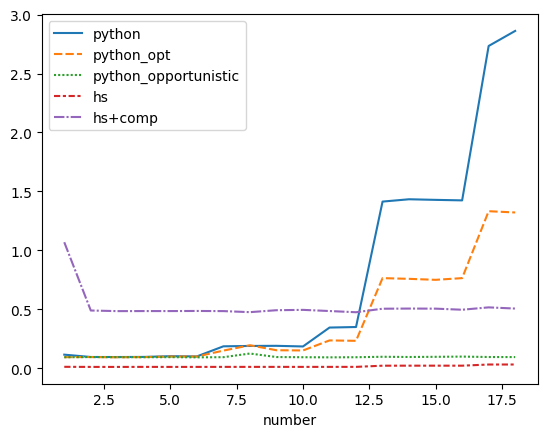

In [12]:
df = pd.DataFrame(df_dict).set_index('number')
sns.lineplot(data=df)
# df